<h1>Actividad evaluable: Mapas de calor y boxplots</h1>

<h3><strong>Equipo:</strong></h3>
<li>A01705420 - Alfonso Antonio Zazueta Bustillos
<li>A01706155 - Manolo Ramírez Pintor
<li>A01701969 - Enrique Guamán Herrera

<h3><strong>Preguntas:</strong></h3>
<ol>
    <li><strong>¿Hay alguna variable que no aporta información?</strong></li>
    <p>Evaporation y Sunshine no tienen datos en algunos estados de Australia
Cloud9am y Cloud3pm en algunos días no contienen datos, varios estados también son inexistentes.
    <p>
    <strong><li>Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?</li></strong>
    <p>Quitaría variables como la dirección del viento porque no suele influír totalmente en la lluvia.
    <p>
    <strong><li>¿Existen variables que tengan datos extraños?</li></strong>
    <p>Sí, la dirección del viento, se tienen que hacer muchas funcionas para determinar más si se quiere crear un modelo de datos.
    <p>
    <strong><li>Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?</li></strong>
    <p>Sí, muchas columnas tienen rangos similares pero no afecta porque siguen siendo variables que dan información muy distinta.
    <p>
    <strong><li>¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?</li></strong>
    <p>La temperatura, la presión, la cantidad de nubes y la humedad, según lo que observé en la base de datos.
    <p>
</ol>

<h3><strong>Inicializar librerías:</strong></h3>
<p>Aquí estaremos poniendo las librerías para comenzar a trabajar con el proyecto.

In [1]:
import seaborn as sb
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import pandas as pd
import statistics as st

<h3><strong>Carga de datos - Descripción:</strong></h3>
<p>Cargaremos los datos ahora que tenemos cargadas las librerías y obtendremos los datos de la tabla de forma textual para saber con qué estamos trabajando.

In [2]:
# Carga de datos
lluvias = pd.read_csv("weatherAUS.csv")
lluvias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<strong><h3>¿Muchos datos nulos?</h3></strong>
<p>Algo de lo que me he percatado es que hay demasiados datos vacíos en esta base de datos, por lo que es útil saber qué tanto falta de 145,000 datoss que tenemos aproximadamente, según lo que vemos en las definiciones de cada columna.

In [4]:
lluvias.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<strong><h3>Nótese que en algunas columnas existen ceros de algunas ciudades porque todos los datos eran nulos - Agrupación de datos:</h3></strong>
<p>Para tener una vista más clara podemos obtener la suma de todas las columnas e ignoramos los datos nulos, por ello utilizamos .groupby("columna).agg(lambda x: x.isna().sum()).reset_index()

In [5]:
# Obtener los datos por ciudad
lluvias.groupby("Location").agg(lambda x: x.isna().sum()).reset_index()

,Location,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Adelaide,0,2.0,3.0,102.0,1489.0,1424.0,26,26.0,274,...,5.0,5.0,8.0,7.0,3193.0,3193.0,5.0,4.0,102,103
1,Albany,0,63.0,54.0,24.0,290.0,520.0,3040,3040.0,247,...,49.0,716.0,25.0,25.0,38.0,711.0,39.0,712.0,24,24
2,Albury,0,11.0,11.0,29.0,3040.0,3040.0,32,32.0,525,...,9.0,8.0,5.0,8.0,1751.0,1613.0,9.0,8.0,29,29
3,AliceSprings,0,1.0,2.0,8.0,215.0,520.0,51,51.0,230,...,3.0,5.0,1.0,3.0,334.0,361.0,0.0,2.0,8,9
4,BadgerysCreek,0,36.0,29.0,81.0,3009.0,3009.0,76,76.0,435,...,54.0,55.0,168.0,173.0,3009.0,3009.0,41.0,44.0,81,81
5,Ballarat,0,1.0,1.0,12.0,3040.0,3040.0,31,31.0,91,...,21.0,7.0,24.0,26.0,546.0,1048.0,12.0,6.0,12,12
6,Bendigo,0,2.0,5.0,6.0,1855.0,3040.0,41,40.0,244,...,7.0,2.0,15.0,10.0,968.0,772.0,3.0,2.0,6,6
7,Brisbane,0,9.0,14.0,32.0,19.0,49.0,41,41.0,70,...,4.0,15.0,1.0,8.0,1.0,2.0,4.0,15.0,32,32
8,Cairns,0,1.0,0.0,52.0,370.0,476.0,19,18.0,43,...,1.0,0.0,1.0,0.0,207.0,230.0,1.0,0.0,52,52
9,Canberra,0,6.0,3.0,18.0,1604.0,1915.0,339,337.0,541,...,63.0,12.0,226.0,221.0,1072.0,1263.0,18.0,7.0,18,18


<strong><h3>Descripción de datos avanzada</h3></strong>
<p>Con la función .describe() podemos obtener una tabla con datos detallados acerca de valores máximos, mínimos, desviaciones estándar, medias y más.

In [22]:
lluvias.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


<strong><h3>Conversión a fecha</h3></strong>
<p>La fecha no es nulo pero necesita ser convertida para poder así crear gráficos que tengan relacion con las condiciones que hagan que exista lluvia.
    Sólo debemos de utilizar la librería de fechas y realizar la conversión con .to_datetime(dataVar.Date)

In [7]:
# Convertir las fechas a un formato correcto
lluvias.Date = pd.to_datetime(lluvias.Date)

<strong><h3>¡Hora de graficar!</h3></strong>
<p>Ya que tenemos todo preparado.

<strong><h3>Histogramas</h3></strong>
<p>Comenzaremos con los histogramas utilizando la función drop([range,range]).hist()

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>],
       [<AxesSubplot:title={'center':'Evaporation'}>,
        <AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>],
       [<AxesSubplot:title={'center':'WindSpeed3pm'}>,
        <AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>],
       [<AxesSubplot:title={'center':'Pressure3pm'}>,
        <AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>],
       [<AxesSubplot:title={'center':'Temp3pm'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

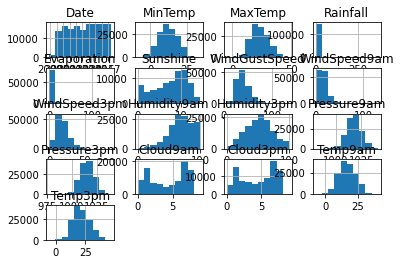

In [17]:
lluvias.drop([0,1]).hist()

<strong><h3>Correlación</h3></strong>
<p>Para las correlaciones utilizaremos los métodos de Pearson y Kendall utilizando .corr(method='pearson') y .corr(method='kendall')

<strong>Método de Pearson</strong>

In [19]:
lluvias.corr(method = 'pearson')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


<strong>Método de Kendall</strong>

In [21]:
lluvias.corr(method = 'kendall')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.538909,0.017663,0.405562,0.073213,0.137989,0.123413,0.125260,-0.148516,0.018808,-0.323642,-0.327708,0.047156,0.008559,0.728705,0.512616
MaxTemp,0.538909,1.000000,-0.224651,0.509550,0.346430,0.066249,0.016298,0.044585,-0.326162,-0.323557,-0.251769,-0.318883,-0.209417,-0.204342,0.710529,0.911737
Rainfall,0.017663,-0.224651,1.000000,-0.234296,-0.305253,0.095816,0.063823,0.052485,0.337840,0.340296,-0.115190,-0.046574,0.300013,0.257107,-0.115452,-0.230048
Evaporation,0.405562,0.509550,-0.234296,1.000000,0.316100,0.181275,0.145975,0.125970,-0.401793,-0.285511,-0.238815,-0.257903,-0.151645,-0.157068,0.485007,0.492444
Sunshine,0.073213,0.346430,-0.305253,0.316100,1.000000,-0.002157,0.018369,0.039047,-0.373377,-0.449171,0.007304,-0.037138,-0.523391,-0.555054,0.222163,0.361773
WindGustSpeed,0.137989,0.066249,0.095816,0.181275,-0.002157,1.000000,0.442199,0.528622,-0.162995,-0.033991,-0.303251,-0.269179,0.043027,0.068740,0.120696,0.042619
WindSpeed9am,0.123413,0.016298,0.063823,0.145975,0.018369,0.442199,1.000000,0.360846,-0.202489,-0.025047,-0.147607,-0.112506,0.012441,0.034233,0.093488,0.008910
WindSpeed3pm,0.125260,0.044585,0.052485,0.125970,0.039047,0.528622,0.360846,1.000000,-0.109421,0.017727,-0.196961,-0.166279,0.034815,0.012536,0.119039,0.030368
Humidity9am,-0.148516,-0.326162,0.337840,-0.401793,-0.373377,-0.162995,-0.202489,-0.109421,1.000000,0.468243,0.086673,0.119146,0.359130,0.275294,-0.307799,-0.321643
Humidity3pm,0.018808,-0.323557,0.340296,-0.285511,-0.449171,-0.033991,-0.025047,0.017727,0.468243,1.000000,-0.013020,0.041453,0.394574,0.404333,-0.126859,-0.360281


<strong><h3>Boxplots</h3></strong>
<p>La librería matplotlib nos da la posibilidad de tener distintos gráficos a partir de todos nuestros datos y ver si hay cierto algoritmo o relación entre distintas variables, por ejemplo:
<p><i>La lluvia depende de tres factores: la presión atmosférica, la temperatura y, especialmente, la humedad atmosférica.</i> <a href="https://es.wikipedia.org/wiki/Lluvia#:~:text=La%20lluvia%20depende%20de%20tres,de%20nieve%20o%20de%20granizo.">Link</a>
<p>Tomando esas variables y analizándolas podemos ver cómo se relacionan de cierta manera entre sí.
<p>Para realizar el graficado se definirá una cadena de variables de interés, en este caso los factores anteriormente mencionados y en un ciclo se creará cada uno de forma automática sin tener que repetir todo nuevamente.
<p>Para graficar sólo se utiliza sb.boxplot(x="variable", y="other_variable", data=tu_base_de_datos, palette="Set3")
<i><p>A causa de crasheos en Python, he decidido sólo tomar alrededor de 3000 datos depurados de la ciudad Sydney. Se importará una nueva base de datos</i>

In [27]:
# Carga de datos
lluvias_sydney = pd.read_csv("weatherAUS_sydney.csv")
lluvias_sydney.Date = pd.to_datetime(lluvias_sydney.Date)

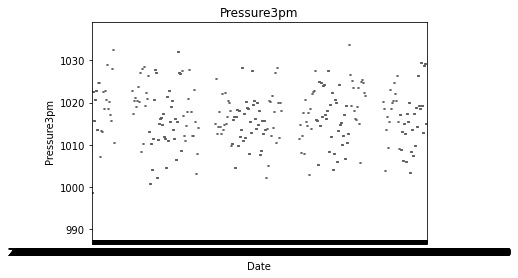

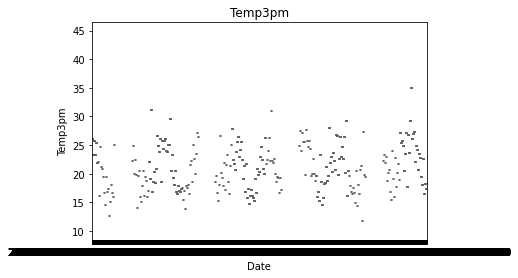

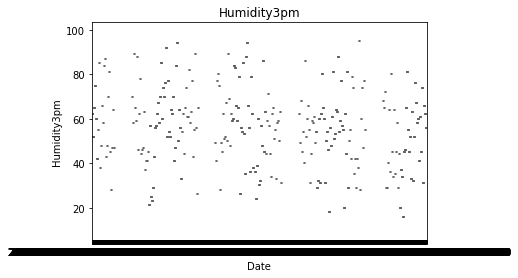

In [30]:
tablas = ["Pressure3pm", "Temp3pm", "Humidity3pm"]

for variable in tablas:
    
    ax = sb.boxplot(x="Date", y=variable, data=lluvias_sydney, palette="Set3")
    
    plt.title(variable)
    plt.xlabel("Date")
    plt.ylabel(variable)
    plt.show()

<strong><h3>Histogramas detallados</h3></strong>
<p>Crearemos unos histogramas para realizar una relación de datos, de esta forma sabremos lo que ocurre cuando existe cierta cantidad de presión, temperatura y humedad para que exista la lluvia.
<p>Se cambiarán los strings yes/no a 0's y 1's de la tabla RainToday para poder hacerlo utilizando .map({'Yes': 1, 'No': 0})
<p>Utilizaremos la funcoón .hist(column=(columna1), by="columna2") para generar los histogramas de las distintas condiciones que hicieron que lloviera.

In [35]:
lluvias_sydney['RainToday'] = lluvias_sydney['RainToday'].map({'Yes': 1, 'No': 0})

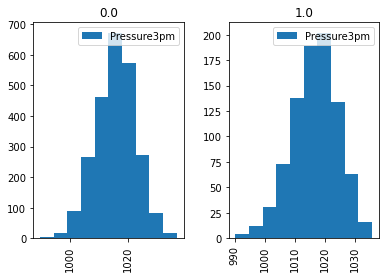

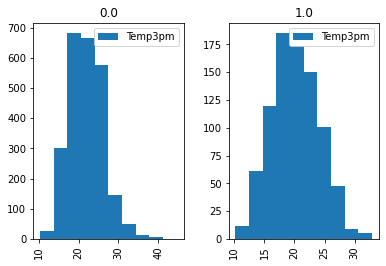

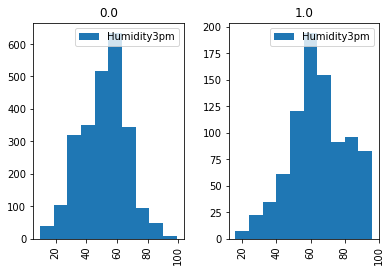

In [45]:
for variable in tablas:

    lluvias_sydney.hist(column=(variable), by="RainToday", grid="false", legend=variable)

<strong><h3>Boxplot<h3></strong>

array([[ nan,  nan,  nan, ...,  8. ,  8. , 20.7],
       [ nan,  nan,  nan, ...,  7. ,  7. , 22.4],
       [ nan,  nan,  nan, ...,  7. ,  8. , 23.5],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

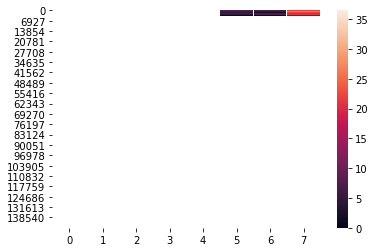

In [77]:
data = lluvias_sydney[lluvias_sydney.columns[12:20]].to_numpy()
heat_map = sb.heatmap(data)
data